In [46]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

<h1> Naive supervised neural network <h1>

In [113]:
##### OPEN CSV FUNCTION #####
def openCsvNaive():
    test_path = '../NN_2048/auto_trained/test.csv'
    df = pd.read_csv(test_path)
    return df

##### HIGHEST SCORE FUNCTION #####
def highestScoreNaive(df):
    highest_score = df[df['highest_score']==df['highest_score'].max()]
    return highest_score

##### MAX TILE FUNCTION #####
def maxTileNaive(df):
    max_tile = df[df['max_tile']==df['max_tile'].max()]
    return max_tile

##### PLOT SCORES FUNCTION #####
def plotScoresNaive(df):
    font = {'family' : 'normal',
        'size'   : 22}

    plt.rc('font', **font)
    x1,x2,x3,y1,y2,y3 = [],[],[],[],[],[]
    for index, row in df.iterrows():
        if row['max_tile'] <= 64:
            x1.append(row['episode'])
            y1.append(row['highest_score'])
        elif row['max_tile'] == 128:
            x2.append(row['episode'])
            y2.append(row['highest_score'])
        else:
            x3.append(row['episode'])
            y3.append(row['highest_score'])

    plt.figure(figsize=(20,16))
    plt.title('Plot scores (Testing Phase)')
    plt.xlabel('Episodes')
    plt.ylabel('Highest score')
    plt.scatter(x=x1, y=y1, s=25, c='red')
    plt.scatter(x=x2, y=y2, s=50, c='#fde910')
    plt.scatter(x=x3, y=y3, s=200, c='green')
    
    red_patch = mpatches.Patch(color='red', label='episodes with max_tile <= 64')
    yellow_patch = mpatches.Patch(color='#fde910', label='episodes with max_tile == 128')
    green_patch = mpatches.Patch(color='green', label='episodes with max_tile >= 256')
    plt.legend(handles=[red_patch, yellow_patch, green_patch])
    
    plt.show()


In [114]:
df_naive = openCsvNaive()
df_naive.head(10)

,episode,episode_steps,highest_score,max_tile
0,4,213,1996.0,128
1,5,148,1236.0,128
2,6,157,1208.0,128
3,7,158,1360.0,128
4,8,171,1432.0,128
5,9,135,1116.0,128
6,12,193,1980.0,256
7,14,159,1344.0,128
8,16,153,1364.0,128
9,19,138,1168.0,128


In [115]:
highestScoreNaive(df_naive)

,episode,episode_steps,highest_score,max_tile
141,276,285,2968.0,256


In [116]:
maxTileNaive(df_naive)

,episode,episode_steps,highest_score,max_tile
6,12,193,1980.0,256
29,61,226,2160.0,256
32,66,208,2172.0,256
42,80,182,2176.0,256
54,104,214,2284.0,256
56,108,201,2212.0,256
71,134,236,2252.0,256
76,143,237,2372.0,256
80,153,262,2808.0,256
85,161,258,2544.0,256


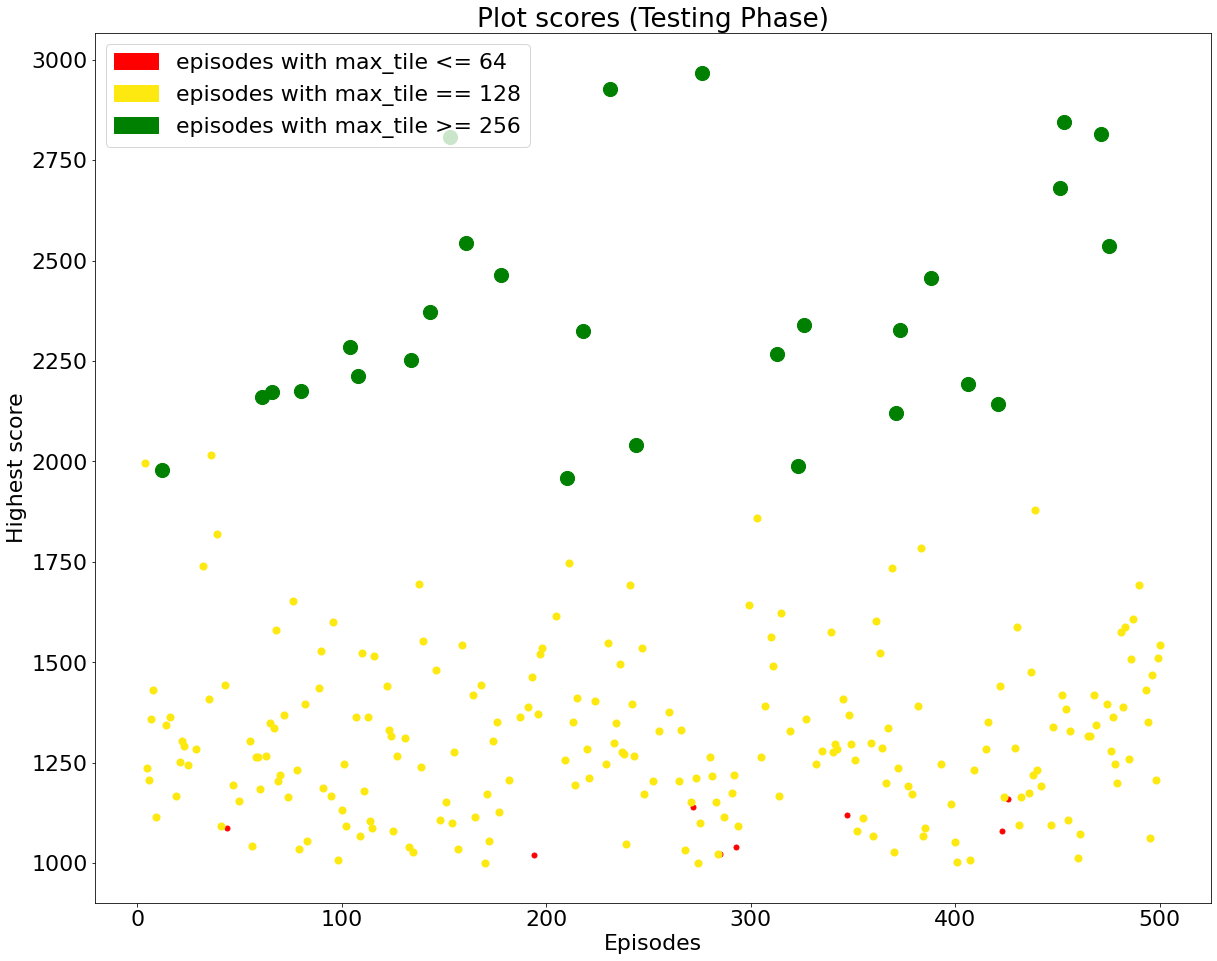

In [117]:
plotScoresNaive(df_naive)

<h1> Deep Reinforcement Learning <h1>

In [47]:
##### OPEN CSV FUNCTION #####
def openCsv(num_episodes_path):
    train_path = 'data/train/train_steps_'
    df = pd.read_csv(train_path+num_episodes_path+'.csv')
    return df

##### TOTAL EPISODES FUNCTION #####
def totEpisodes(df):
    tot_episodes = df['episode'].max()
    return tot_episodes

##### HIGHEST SCORE FUNCTION #####
def highestScore(df):
    highest_score = df[df['highest_score']==df['highest_score'].max()]
    return highest_score

##### MAX TILE FUNCTION #####
def maxTile(df):
    max_tile = df[df['max_tile']==df['max_tile'].max()]
    return max_tile

##### PLOT SCORES FUNCTION #####
def plotScores(df, num_episodes):
    font = {'family' : 'normal',
        'size'   : 22}

    plt.rc('font', **font)
    x1,x2,x3,x4,y1,y2,y3,y4 = [],[],[],[],[],[],[],[]
    for index, row in df.iterrows():
        if row['max_tile'] <= 256:
            x1.append(row['episode'])
            y1.append(row['highest_score'])
        elif row['max_tile'] == 512:
            x2.append(row['episode'])
            y2.append(row['highest_score'])
        elif row['max_tile'] == 1024:
            x3.append(row['episode'])
            y3.append(row['highest_score'])
        else:
            x4.append(row['episode'])
            y4.append(row['highest_score'])
    plt.figure(figsize=(20,16))
    plt.title('Plot scores for '+str(num_episodes)+' number of episodes (Training Phase)')
    plt.xlabel('Episodes')
    plt.ylabel('Highest score')
    plt.scatter(x=x1, y=y1, s=1, c='red')
    plt.scatter(x=x2, y=y2, s=50, c='#fde910')
    plt.scatter(x=x3, y=y3, s=200, c='green')
    plt.scatter(x=x4, y=y4, s=1000, c='#1E90FF')
    
    red_patch = mpatches.Patch(color='red', label='episodes with max_tile <= 256')
    yellow_patch = mpatches.Patch(color='#fde910', label='episodes with max_tile == 512')
    green_patch = mpatches.Patch(color='green', label='episodes with max_tile == 1024')
    blue_patch = mpatches.Patch(color='#1E90FF', label='episodes with max_tile >= 2048')
    plt.legend(handles=[red_patch, yellow_patch,green_patch,blue_patch])
    
    plt.show()

##### PLOT TILES FUNCTION #####
def plotMaxTiles(df, num_episodes):
    font = {'family' : 'normal',
        'size'   : 22}
    
    plt.rc('font', **font)
    x_lowest,y_lowest,x_512,y_512,x_1024,y_1024,x_2048,y_2048 = [],[],[],[],[],[],[],[]
    for index, row in df.iterrows():
        if row['max_tile'] < 512:
            x_lowest.append(row['episode'])
            y_lowest.append(row['max_tile'])
        elif row['max_tile'] == 512:
            x_512.append(row['episode'])
            y_512.append(row['max_tile'])
        elif row['max_tile'] == 1024:
            x_1024.append(row['episode'])
            y_1024.append(row['max_tile'])
        elif row['max_tile'] == 2048:
            x_2048.append(row['episode'])
            y_2048.append(row['max_tile'])
    
    plt.figure(figsize=(20,16))
    plt.title('Plot max tiles for '+str(num_episodes)+' number of episodes (Training Phase)')
    plt.xlabel('Episodes')
    plt.ylabel('Max Tile')
    x = df['episode']
    y = df['max_tile']
    plt.scatter(x=x_lowest, y=y_lowest, s=1, c='red')
    plt.scatter(x=x_512, y=y_512, s=25, c='#fde910')
    plt.scatter(x=x_1024, y=y_1024, s=50, c='green')
    plt.scatter(x=x_2048, y=y_2048, s=1000, c='#1E90FF')
    
    red_patch = mpatches.Patch(color='red', label='max_tile <= 256')
    yellow_patch = mpatches.Patch(color='#fde910', label='max_tile == 512')
    green_patch = mpatches.Patch(color='green', label='max_tile == 1024')
    blue_patch = mpatches.Patch(color='#1E90FF', label='max_tile == 2048')
    plt.legend(handles=[red_patch, yellow_patch,green_patch,blue_patch])
    
    
    plt.show()
    
##### OPEN CSV FUNCTION #####
def openTestCsv(num_episodes_path):
    test_path = 'data/test/test_steps_'
    df = pd.read_csv(test_path+num_episodes_path+'.csv')
    return df
    
##### PLOT SCORES TEST PHASE FUNCTION #####
def plotScoresTestPhase(df, num_episodes):
    font = {'family' : 'normal',
        'size'   : 18}

    plt.rc('font', **font)
    x1,x2,x3,x4,y1,y2,y3,y4 = [],[],[],[],[],[],[],[]
    for index, row in df.iterrows():
        if row['max_tile'] <= 256:
            x1.append(row['episode'])
            y1.append(row['highest_score'])
        elif row['max_tile'] == 512:
            x2.append(row['episode'])
            y2.append(row['highest_score'])
        elif row['max_tile'] == 1024:
            x3.append(row['episode'])
            y3.append(row['highest_score'])
        else:
            x4.append(row['episode'])
            y4.append(row['highest_score'])
    plt.figure(figsize=(20,16))
    plt.title('Plot scores for '+str(num_episodes)+' number of episodes (Test Phase)')
    plt.xlabel('Episodes')
    plt.ylabel('Highest score')
    plt.scatter(x=x1, y=y1, s=25, c='#FFA500')
    plt.scatter(x=x2, y=y2, s=50, c='#FF4500')
    plt.scatter(x=x3, y=y3, s=200, c='#FFD700')
    plt.scatter(x=x4, y=y4, s=1000, c='#DAA520')
    
    red_patch = mpatches.Patch(color='#FFA500', label='episodes with max_tile <= 256')
    yellow_patch = mpatches.Patch(color='#FF4500', label='episodes with max_tile == 512')
    green_patch = mpatches.Patch(color='#FFD700', label='episodes with max_tile == 1024')
    blue_patch = mpatches.Patch(color='#DAA520', label='episodes with max_tile >= 2048')
    plt.legend(handles=[red_patch, yellow_patch,green_patch,blue_patch])
    
    plt.show()

# Evaluation Scheme:

For each execution (in which we set a number of different training steps) we report:
1. An extract of the csv saved in the train (Pandas dataframe)
2. Number of games he trained on (episodes)
3. Highest score achieved in training
4. Max tile achieved in training
5. Scatter plot of scores achieved in training & test (only for the last three execution)
6. Scatter plot of max tile achieved in training & test (only for the last three execution)

NB: For Test Phase in each execution we perform 500 episodes

## First case: 5000 steps (Training)

In [48]:
##### NB_STEPS_TRAINING = int(5e3) #####

num_steps_5e3 = int(5e3)
df_5e3 = openCsv(str(num_steps_5e3))
df_5e3.head(10)

,episode,episode_steps,highest_score,max_tile
0,1,128,348.0,32.0
1,2,719,1156.0,128.0
2,3,386,512.0,64.0
3,4,1054,1432.0,128.0
4,5,571,760.0,64.0
5,6,807,1656.0,128.0
6,7,565,1364.0,128.0
7,8,607,880.0,64.0


In [49]:
totEpisodes(df_5e3)

8

In [50]:
highestScore(df_5e3)

,episode,episode_steps,highest_score,max_tile
5,6,807,1656.0,128.0


In [51]:
maxTile(df_5e3)

,episode,episode_steps,highest_score,max_tile
1,2,719,1156.0,128.0
3,4,1054,1432.0,128.0
5,6,807,1656.0,128.0
6,7,565,1364.0,128.0


## First case: 5000 steps (Testing)

In [52]:
## Testing

df_5e3_test = openTestCsv(str(num_steps_5e3))
df_5e3_test

,episode,episode_steps,highest_score,max_tile
0,0,684,660.0,64
1,1,2598,1304.0,128
2,2,1151,636.0,64
3,3,5321,1464.0,128
4,4,2652,1336.0,128
...,...,...,...,...
495,495,2230,820.0,64
496,496,4471,1312.0,128
497,497,3070,1080.0,128
498,498,4287,1556.0,128


In [53]:
highestScore(df_5e3_test)

,episode,episode_steps,highest_score,max_tile
329,329,7721,3144.0,256


In [54]:
maxTile(df_5e3_test)

,episode,episode_steps,highest_score,max_tile
72,72,2391,1916.0,256
81,81,4927,1984.0,256
82,82,6045,2280.0,256
86,86,5633,2472.0,256
97,97,4076,2352.0,256
107,107,2711,2092.0,256
108,108,3898,2476.0,256
112,112,3555,2004.0,256
150,150,4033,2804.0,256
153,153,5633,2240.0,256


## Second case: 50.000 steps (Training)

In [55]:
##### NB_STEPS_TRAINING = int(5e4) #####

num_steps_5e4 = int(5e4)
df_5e4 = openCsv(str(num_steps_5e4))
df_5e4.head(10)

,episode,episode_steps,highest_score,max_tile
0,1,128,348.0,32.0
1,2,719,1156.0,128.0
2,3,386,512.0,64.0
3,4,1054,1432.0,128.0
4,5,571,760.0,64.0
5,6,807,1656.0,128.0
6,7,565,1364.0,128.0
7,8,607,880.0,64.0
8,9,522,1964.0,128.0
9,10,402,1388.0,128.0


In [56]:
totEpisodes(df_5e4)

155

In [57]:
highestScore(df_5e4)

,episode,episode_steps,highest_score,max_tile
139,140,599,6916.0,512.0


In [58]:
maxTile(df_5e4)

,episode,episode_steps,highest_score,max_tile
54,55,426,5196.0,512.0
77,78,408,5252.0,512.0
79,80,551,6196.0,512.0
81,82,501,5312.0,512.0
85,86,522,5516.0,512.0
94,95,416,5528.0,512.0
108,109,388,4600.0,512.0
112,113,416,4676.0,512.0
115,116,513,5268.0,512.0
123,124,300,4564.0,512.0


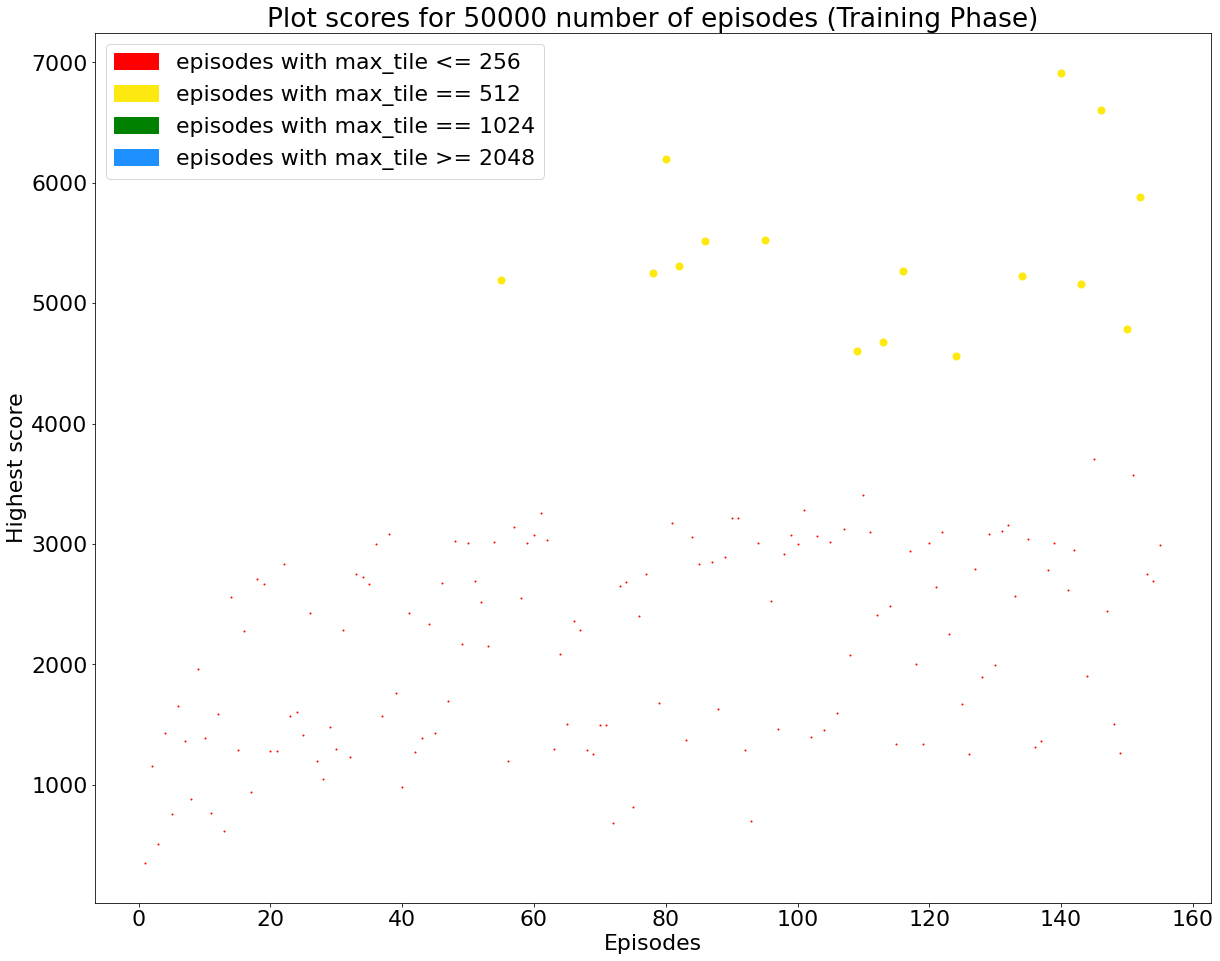

In [59]:
plotScores(df_5e4, num_steps_5e4)

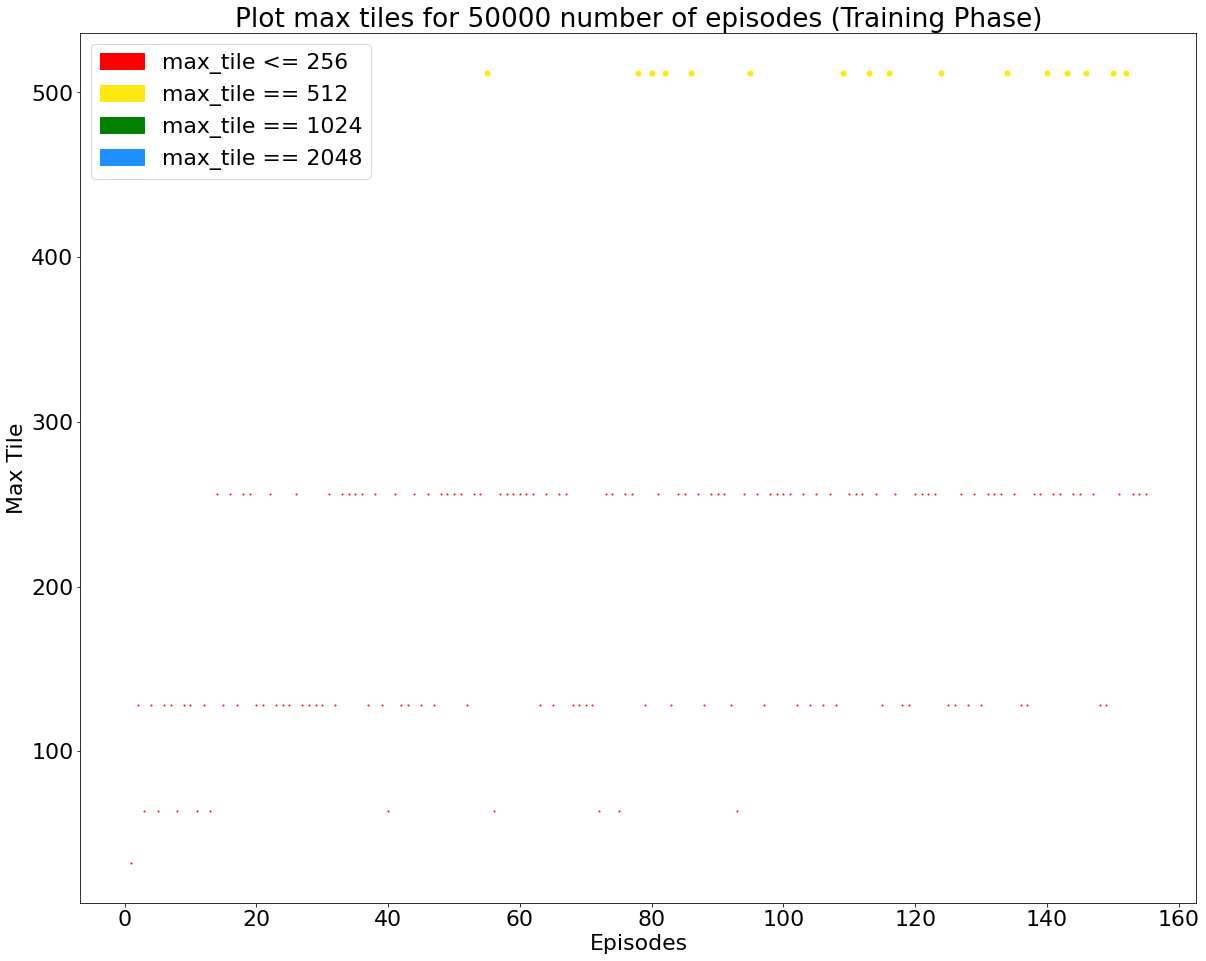

In [60]:
plotMaxTiles(df_5e4, num_steps_5e4)

## Second case: 50.000 steps (Testing)

In [61]:
## Testing

df_5e4_test = openTestCsv(str(num_steps_5e4))
df_5e4_test

,episode,episode_steps,highest_score,max_tile
0,0,1040,2764.0,256
1,1,1168,4484.0,512
2,2,766,2300.0,256
3,3,526,2920.0,256
4,4,1320,2304.0,256
...,...,...,...,...
495,495,2309,2976.0,256
496,496,322,2788.0,256
497,497,1106,2764.0,256
498,498,1401,2560.0,256


In [62]:
highestScore(df_5e4_test)

,episode,episode_steps,highest_score,max_tile
422,422,2083,6980.0,512


In [63]:
maxTile(df_5e4_test)

,episode,episode_steps,highest_score,max_tile
1,1,1168,4484.0,512
10,10,646,4848.0,512
21,21,1422,6824.0,512
24,24,675,6568.0,512
29,29,1017,4916.0,512
...,...,...,...,...
486,486,1218,6304.0,512
489,489,2205,6788.0,512
493,493,994,5212.0,512
494,494,1574,5244.0,512


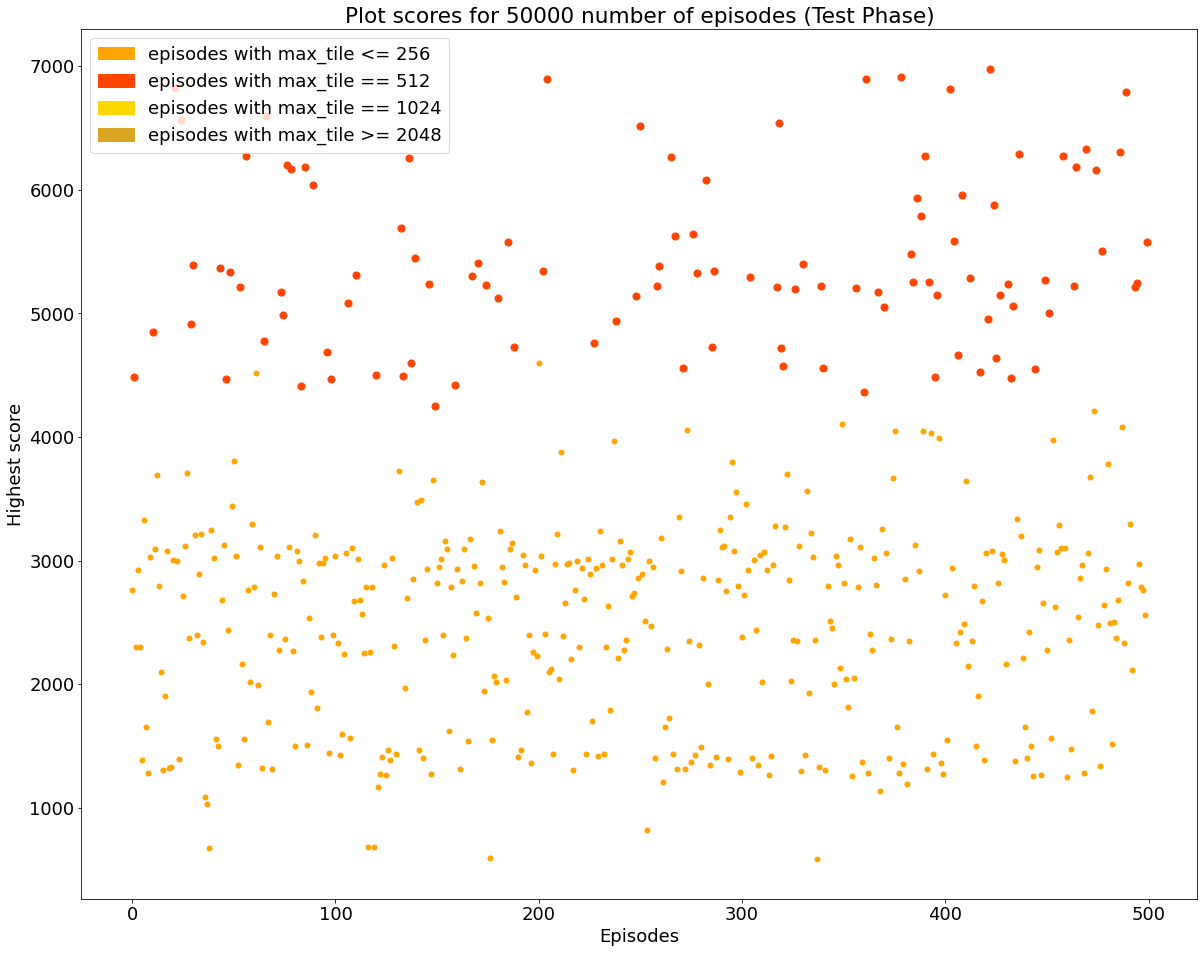

In [64]:
plotScoresTestPhase(df_5e4_test, num_steps_5e4)

## Third case: 500.000 steps (Training)

In [65]:
##### NB_STEPS_TRAINING = int(5e5) #####

num_steps_5e5 = int(5e5)
df_5e5 = openCsv(str(num_steps_5e5))
df_5e5.head(10)

,episode,episode_steps,highest_score,max_tile
0,1,570,432.0,32.0
1,2,686,656.0,64.0
2,3,1085,1260.0,128.0
3,4,776,860.0,128.0
4,5,682,1096.0,64.0
5,6,955,1480.0,128.0
6,7,320,544.0,64.0
7,8,609,1272.0,64.0
8,9,431,1348.0,128.0
9,10,436,672.0,64.0


In [66]:
totEpisodes(df_5e5)

1118

In [67]:
highestScore(df_5e5)

,episode,episode_steps,highest_score,max_tile
1073,1074,852,13784.0,1024.0


In [68]:
maxTile(df_5e5)

,episode,episode_steps,highest_score,max_tile
699,700,682,10336.0,1024.0
859,860,703,10860.0,1024.0
878,879,784,11288.0,1024.0
1003,1004,697,11268.0,1024.0
1019,1020,800,11960.0,1024.0
1073,1074,852,13784.0,1024.0


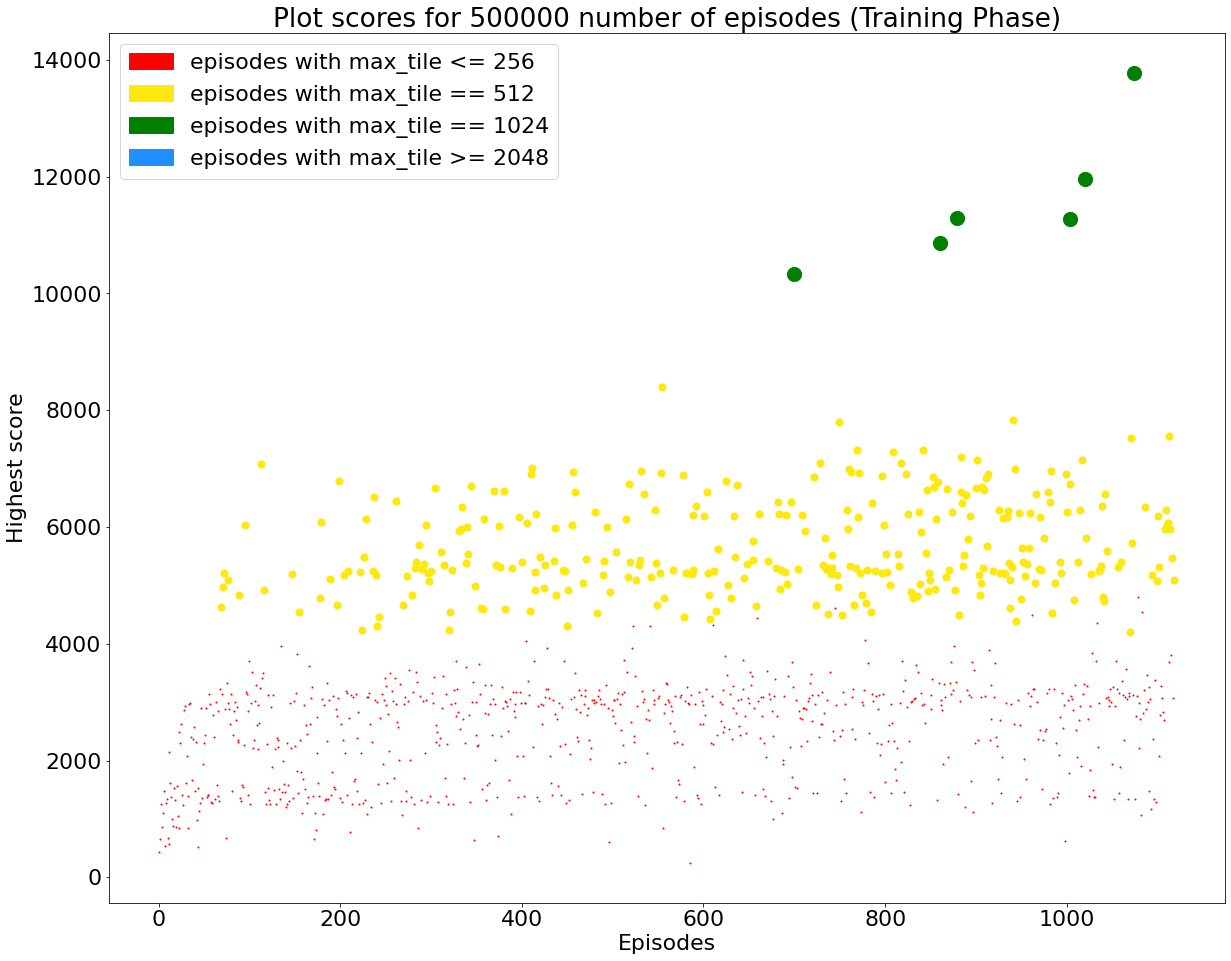

In [69]:
plotScores(df_5e5, num_steps_5e5)

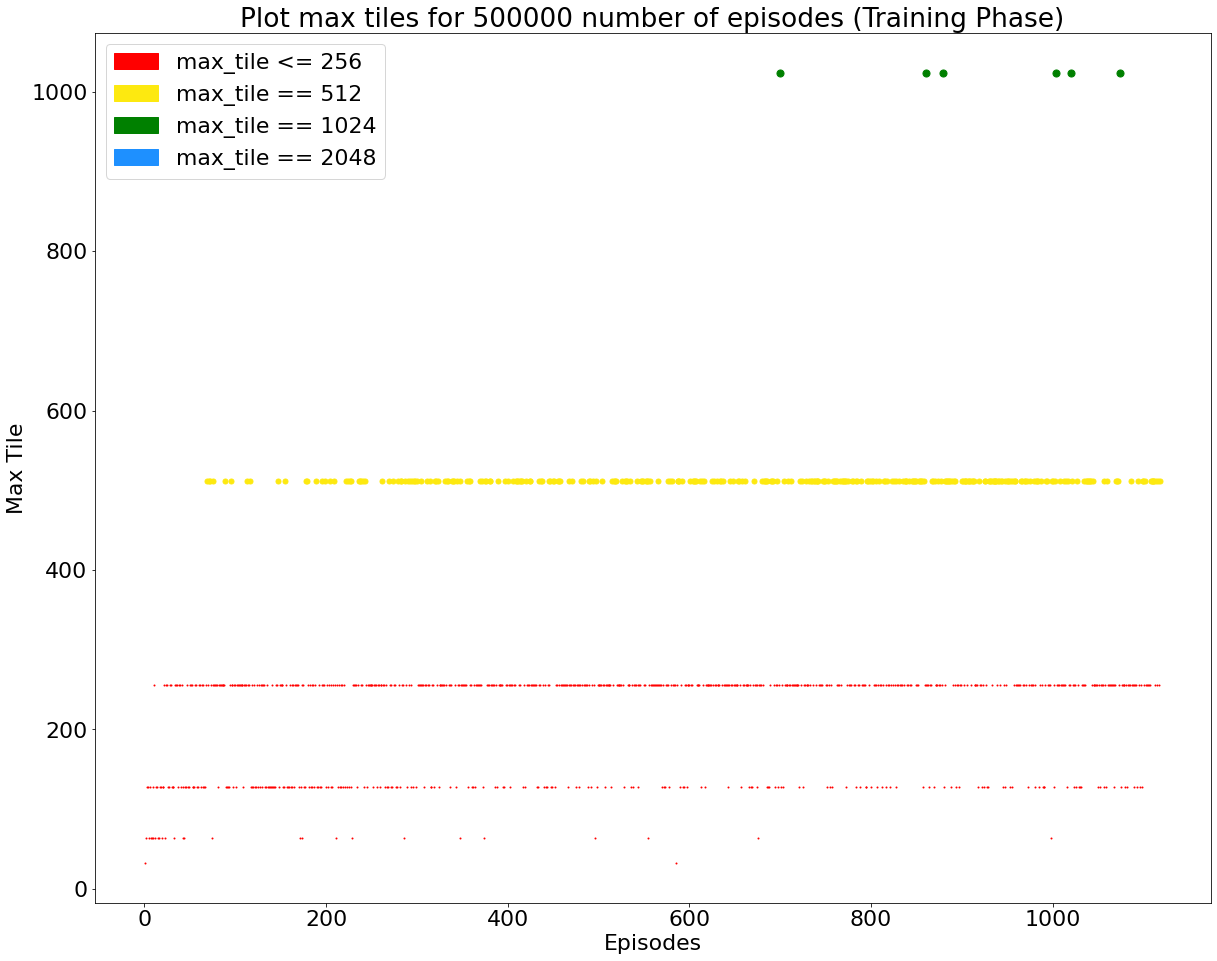

In [70]:
plotMaxTiles(df_5e5, num_steps_5e5)

## Third case: 500.000 steps (Testing)

In [71]:
## Testing

df_5e5_test = openTestCsv(str(num_steps_5e5))
df_5e5_test

,episode,episode_steps,highest_score,max_tile
0,0,399,3080.0,256
1,1,755,5356.0,512
2,2,1854,6992.0,512
3,3,414,5652.0,512
4,4,1268,5380.0,512
...,...,...,...,...
495,495,898,5468.0,512
496,496,1047,5404.0,512
497,497,1230,4448.0,256
498,498,993,10160.0,1024


In [72]:
highestScore(df_5e5_test)

,episode,episode_steps,highest_score,max_tile
245,245,2873,14900.0,1024


In [73]:
maxTile(df_5e5_test)

,episode,episode_steps,highest_score,max_tile
17,17,2320,11824.0,1024
65,65,1968,12796.0,1024
73,73,1368,11640.0,1024
92,92,745,9948.0,1024
108,108,2859,11260.0,1024
130,130,2878,13988.0,1024
152,152,1761,9888.0,1024
170,170,2161,11460.0,1024
192,192,977,10100.0,1024
203,203,809,11432.0,1024


## Third case: 500.000 steps (Testing)

In [74]:
## Testing

df_5e5_test = openTestCsv(str(num_steps_5e5))
df_5e5_test

,episode,episode_steps,highest_score,max_tile
0,0,399,3080.0,256
1,1,755,5356.0,512
2,2,1854,6992.0,512
3,3,414,5652.0,512
4,4,1268,5380.0,512
...,...,...,...,...
495,495,898,5468.0,512
496,496,1047,5404.0,512
497,497,1230,4448.0,256
498,498,993,10160.0,1024


In [75]:
highestScore(df_5e5_test)

,episode,episode_steps,highest_score,max_tile
245,245,2873,14900.0,1024


In [76]:
maxTile(df_5e5_test)

,episode,episode_steps,highest_score,max_tile
17,17,2320,11824.0,1024
65,65,1968,12796.0,1024
73,73,1368,11640.0,1024
92,92,745,9948.0,1024
108,108,2859,11260.0,1024
130,130,2878,13988.0,1024
152,152,1761,9888.0,1024
170,170,2161,11460.0,1024
192,192,977,10100.0,1024
203,203,809,11432.0,1024


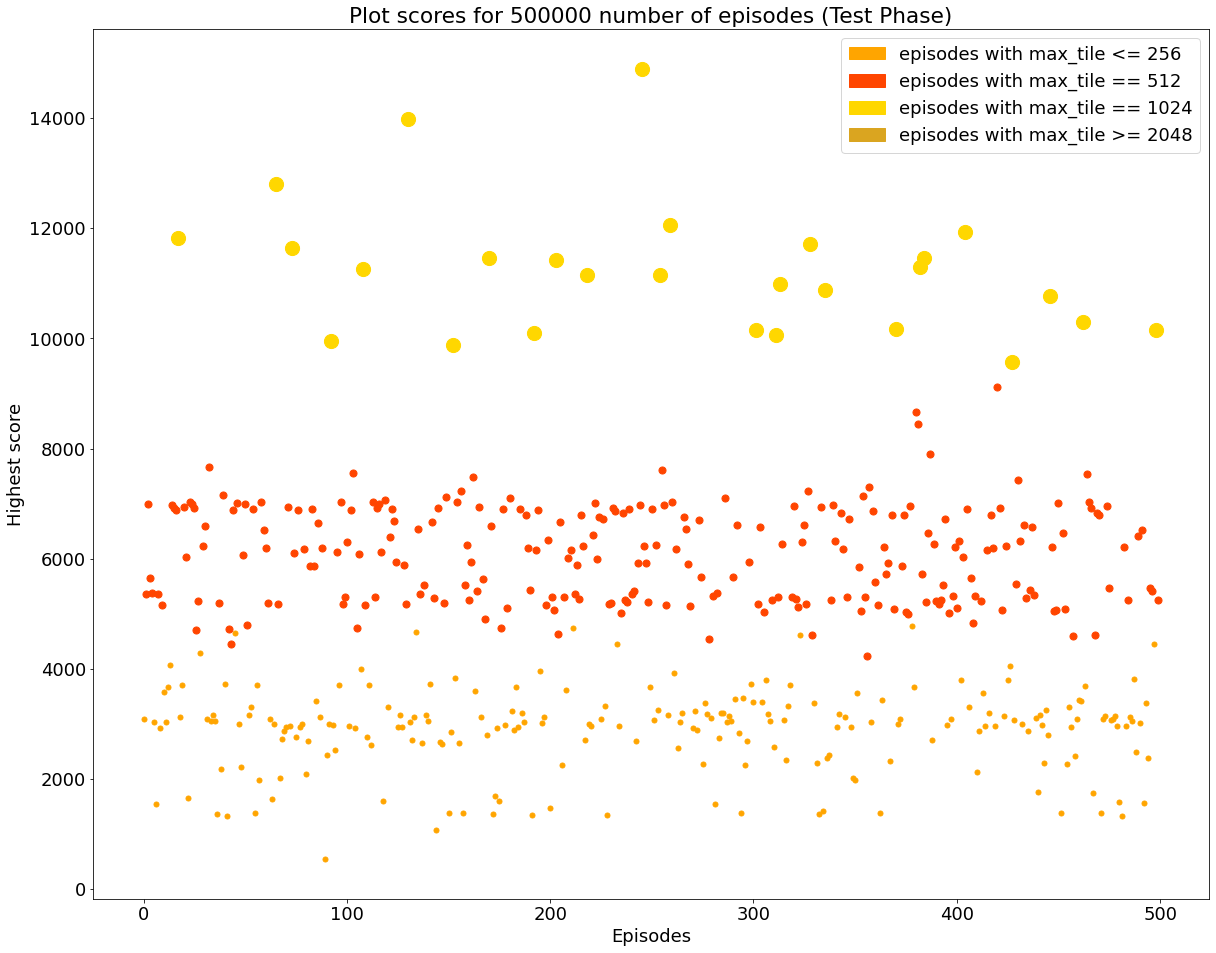

In [77]:
plotScoresTestPhase(df_5e5_test, num_steps_5e5)

## Fourth case: 5.000.000 steps (Training)

In [78]:
##### NB_STEPS_TRAINING = int(5e6) #####

num_steps_5e6 = int(5e6)
df_5e6 = openCsv(str(num_steps_5e6))
df_5e6.head(10)

,episode,episode_steps,highest_score,max_tile
0,1,570,432.0,32.0
1,2,686,656.0,64.0
2,3,1085,1260.0,128.0
3,4,776,860.0,128.0
4,5,682,1096.0,64.0
5,6,955,1480.0,128.0
6,7,320,544.0,64.0
7,8,286,588.0,64.0
8,9,285,792.0,64.0
9,10,405,1716.0,128.0


In [79]:
totEpisodes(df_5e6)

11168

In [80]:
highestScore(df_5e6)

,episode,episode_steps,highest_score,max_tile
7561,7562,1162,20640.0,2048.0


In [81]:
maxTile(df_5e6)

,episode,episode_steps,highest_score,max_tile
3847,3848,915,19956.0,2048.0
7561,7562,1162,20640.0,2048.0
8710,8711,1028,20212.0,2048.0
9748,9749,1095,20272.0,2048.0
9960,9961,1081,20104.0,2048.0
10036,10037,1179,20288.0,2048.0
10516,10517,1000,19940.0,2048.0


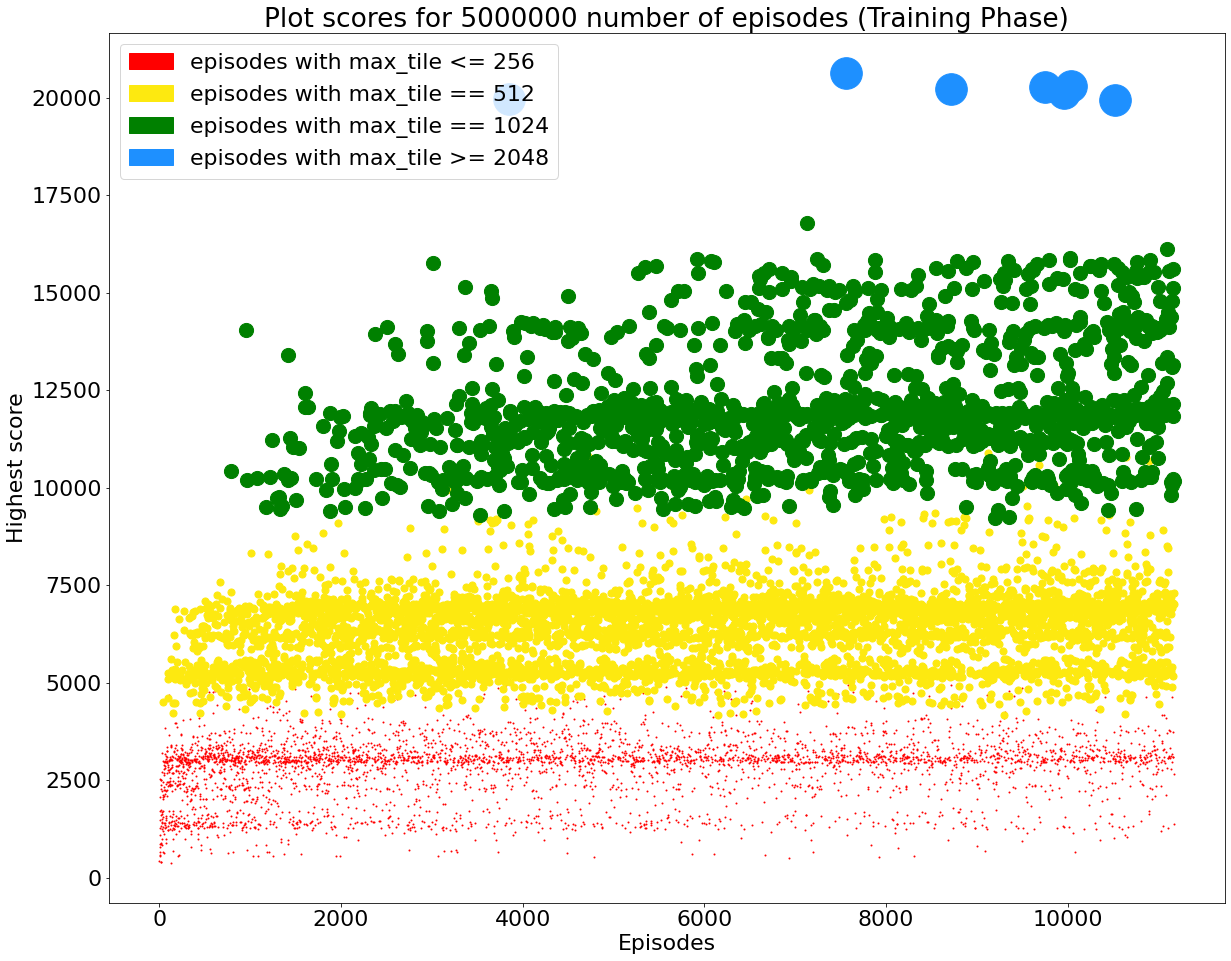

In [82]:
plotScores(df_5e6, num_steps_5e6)

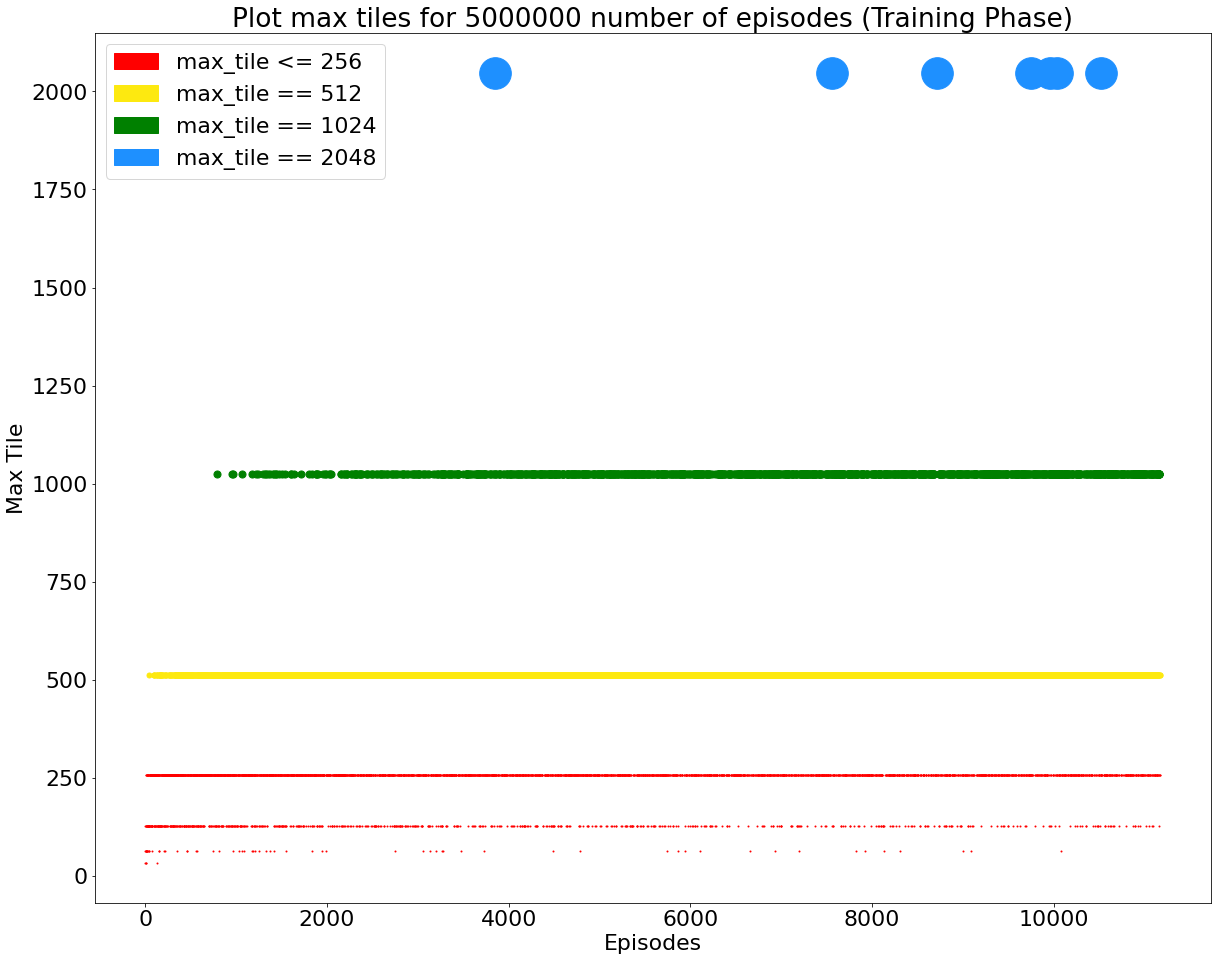

In [83]:
plotMaxTiles(df_5e6, num_steps_5e6)

## Fourth case: 5.000.000 steps (Testing)

In [84]:
## Testing

df_5e6_test = openTestCsv(str(num_steps_5e6))
df_5e6_test

,episode,episode_steps,highest_score,max_tile
0,0,196,2632.0,256
1,1,289,2948.0,256
2,2,1441,7032.0,512
3,3,1041,3840.0,256
4,4,327,4912.0,512
...,...,...,...,...
495,495,686,7000.0,512
496,496,193,2428.0,256
497,497,530,3180.0,256
498,498,402,6276.0,512


In [85]:
highestScore(df_5e6_test)

,episode,episode_steps,highest_score,max_tile
288,288,3077,20808.0,2048


In [86]:
maxTile(df_5e6_test)

,episode,episode_steps,highest_score,max_tile
288,288,3077,20808.0,2048
440,440,2680,19936.0,2048


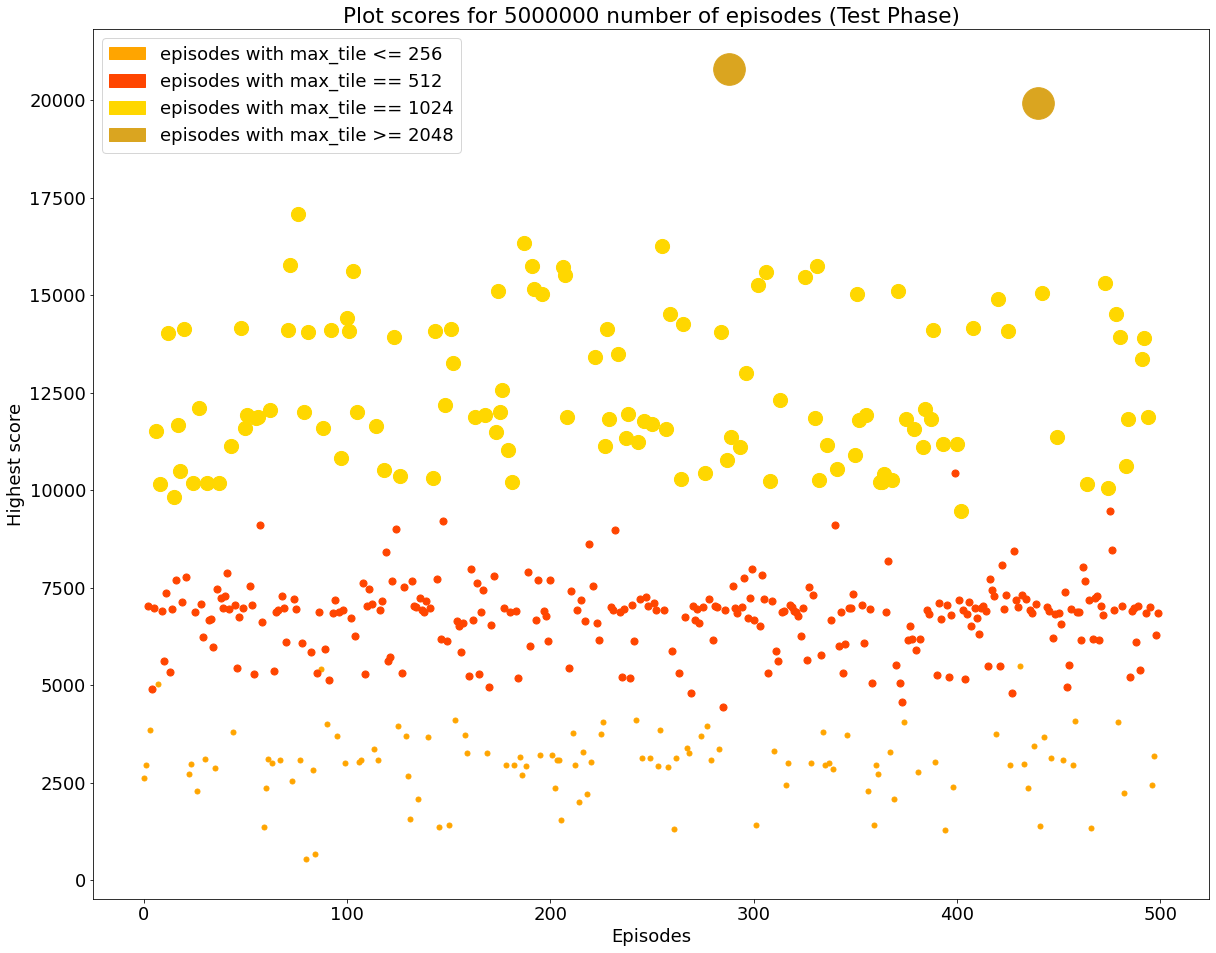

In [87]:
plotScoresTestPhase(df_5e6_test, num_steps_5e6)

## Fifth case: 10.000.000 steps

In [88]:
# DA VEDERE 

# Highest score evolution during executions

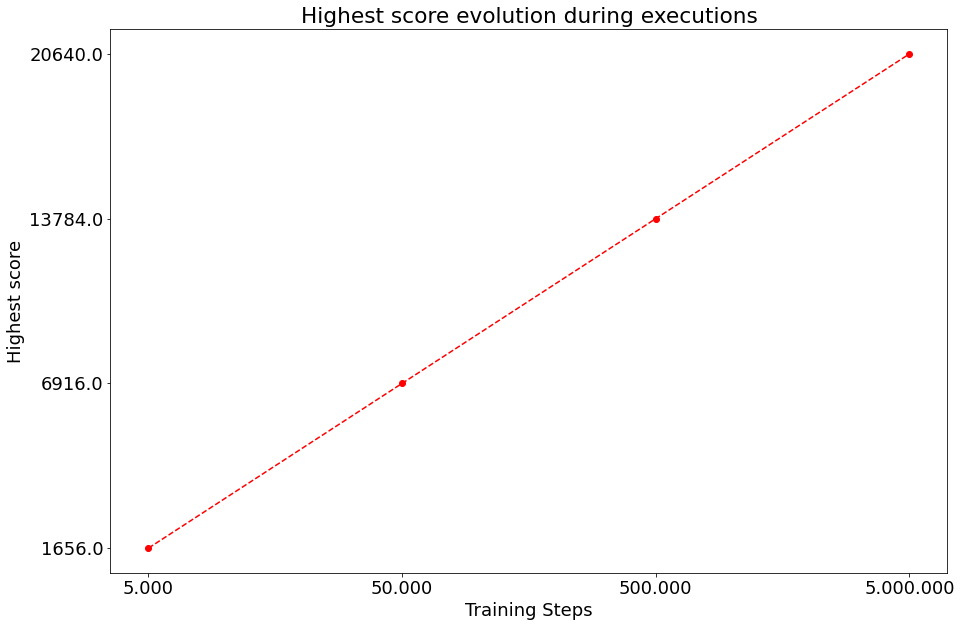

In [89]:
highest_score_df3 = df_5e3['highest_score'].max()
highest_score_df4 = df_5e4['highest_score'].max()
highest_score_df5 = df_5e5['highest_score'].max()
highest_score_df6 = df_5e6['highest_score'].max()

data = np.array([
    ["5.000", highest_score_df3],
    ["50.000", highest_score_df4],
    ["500.000", highest_score_df5],
    ["5.000.000", highest_score_df6],
])

font = {'family' : 'normal',
        'size'   : 18}
    
plt.rc('font', **font)
x, y = data.T
plt.figure(figsize=(15,10))
plt.title('Highest score evolution during executions')
plt.xlabel('Training Steps')
plt.ylabel('Highest score')
plt.plot(x,y,'r--')
plt.scatter(x,y,c='red')
plt.show()

# Scores evolution comparisons between different training steps

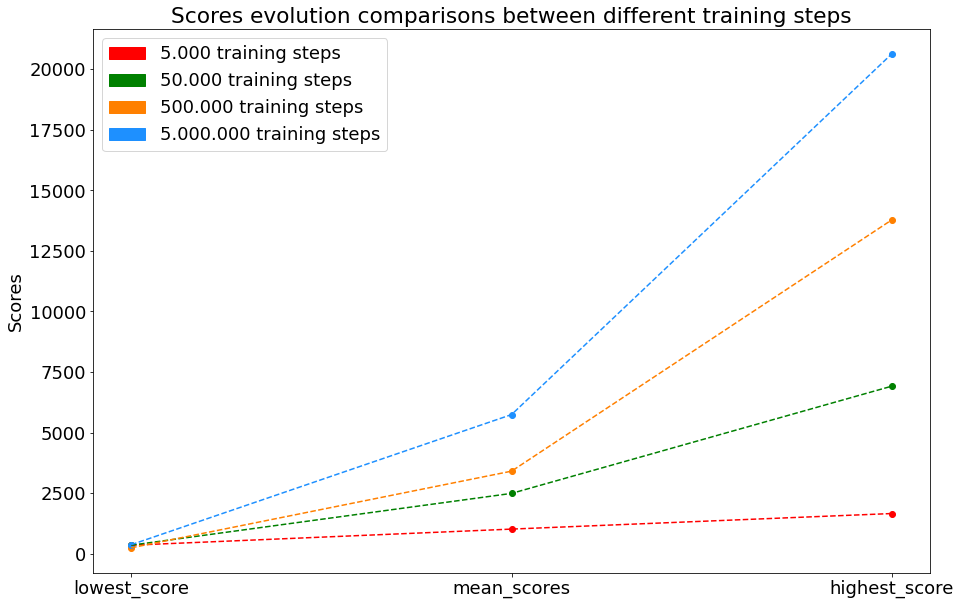

In [90]:
def get_scores_evolution(df): 
    evolution = []
    evolution.append(int(df['highest_score'].min())) # lowest score
    evolution.append(int(df['highest_score'].mean())) # mean of the scores
    evolution.append(int(df['highest_score'].max())) # Highest score
    return evolution

scores_evolution_df_5e3 = get_scores_evolution(df_5e3)
scores_evolution_df_5e4 = get_scores_evolution(df_5e4)
scores_evolution_df_5e5 = get_scores_evolution(df_5e5)
scores_evolution_df_5e6 = get_scores_evolution(df_5e6)

font = {'family' : 'normal',
        'size'   : 18}
    
plt.rc('font', **font)
plt.figure(figsize=(15,10))
plt.title('Scores evolution comparisons between different training steps')
plt.ylabel('Scores')
x = ["lowest_score","mean_scores","highest_score"]

plt.plot(x,scores_evolution_df_5e3, 'r--', color="red")
plt.scatter(x,scores_evolution_df_5e3, color="red")

plt.plot(x,scores_evolution_df_5e4,'r--', color="green")
plt.scatter(x,scores_evolution_df_5e4, color="green")

plt.plot(x,scores_evolution_df_5e5,'r--', color="#ff8000")
plt.scatter(x,scores_evolution_df_5e5, color="#ff8000")

plt.plot(x,scores_evolution_df_5e6,'r--', color="#1E90FF")
plt.scatter(x,scores_evolution_df_5e6, color="#1E90FF")

red_patch = mpatches.Patch(color='red', label='5.000 training steps')
green_patch = mpatches.Patch(color='green', label='50.000 training steps')
orange_patch = mpatches.Patch(color='#ff8000', label='500.000 training steps')
blue_patch = mpatches.Patch(color='#1E90FF', label='5.000.000 training steps')
plt.legend(handles=[red_patch, green_patch,orange_patch,blue_patch])

plt.show()